In [1]:
"""
File ufficiale dove implemento la parte di opinion dynamics del mio modello, con matrice delle caratteristiche costante e
matrice di adiacenza variabile.
"""

'\nFile ufficiale dove implemento la parte di opinion dynamics del mio modello, con matrice delle caratteristiche costante e\nmatrice di adiacenza variabile.\n'

PARTE 2) DINAMICA DI RETE CON MATRICE DELLE CARATTERISTICHE COSTANTE

1. IMPORTO LE LIBRERIE NECESSARIE

In [2]:
"""
Importo nel file le librerie e il file con dentro le funzioni ausiliarie che che ho implementato io per poterle usare all' occorrenza.
"""

"\nImporto nel file le librerie e il file con dentro le funzioni ausiliarie che che ho implementato io per poterle usare all' occorrenza.\n"

In [2]:
import networkx as nx
import numpy as np
from funzioni_utili import* #importo tutte le funzioni implementate e salvate nell' altro file
#from funzioni_utili_1 import*
import random as random
import math

PARTE2_a)INIZIO PROVANDO A LANCIARE IL CASO BASE: BASSE T E BASSE N

2. DEFINIZIONE PARAMETRI

In [4]:
"""
Definizione delle costanti o valori iniziali delle variabili che verranno utilizzate nel modello.

"""

'\nDefinizione delle costanti o valori iniziali delle variabili che verranno utilizzate nel modello.\n\n'

In [5]:
N = 2 #numero di nodi
T = 2 #numero di topic
G =nx.Graph()
beta=1
n_time=10 #tempi integraione

3. INIZIALIZZAZIONE MATRICI

In [6]:
"""

Le matrici necessarie per il modello sono:
1) la matrice di adiacenza A
2) la matrice delle caratteristiche C
3) la matrice dei pesi delle caratteristiche W
4) la matrice dei coseni phi

"""


'\n\nLe matrici necessarie per il modello sono:\n1) la matrice di adiacenza A\n2) la matrice delle caratteristiche C\n3) la matrice dei pesi delle caratteristiche W\n4) la matrice dei coseni phi\n\n'

In [7]:
C = np.zeros((n_time,T,N))
W = np.zeros((T,N))
phi = np.zeros((T,T))
A=np.zeros((N,N))

3a)INIZIALIZZAZIONE MATRICE DELLE CARATTERISTICHE

In [8]:
C_0=np.zeros((n_time,T,N))
#print("matrice caratteristiche:\n",C_0)  #prova
#print("tipo:\n",type(C_0))
#C_0=np.ones((T,N))                       #prova
#print("matrice caratteristiche:\n",C_0)

for t in range(n_time):                #prova
    for i in range(T):
        for j in range(N):
            C_0[t][i][j]= random.uniform(-10,10)

print("C_0:\n",C_0)
print("C_0[t]:\n",C_0[t])

C_0:
 [[[-0.99911354 -1.70885764]
  [ 3.89582725  2.59982492]]

 [[ 9.07067689  7.09501566]
  [ 1.92858456  9.27227418]]

 [[ 1.31218082 -8.41853225]
  [-2.90785723  6.74404406]]

 [[ 3.02109806  0.36225156]
  [ 2.50924877 -1.52008292]]

 [[-1.07169134  2.57654259]
  [ 9.63492588  4.22503406]]

 [[-2.60244033 -0.06097715]
  [-8.9716715   7.6051388 ]]

 [[-7.27759902  1.15360255]
  [-4.2583328  -5.85311182]]

 [[-8.29413499  5.58729042]
  [-0.70161227  3.03550647]]

 [[-7.53467789 -9.80717616]
  [-9.69572078  0.29760373]]

 [[ 7.97899412 -7.22770409]
  [ 1.53926944 -6.77782553]]]
C_0[t]:
 [[ 7.97899412 -7.22770409]
 [ 1.53926944 -6.77782553]]


3b)INIZIALIZZAZIONE MATRICE PESI

In [9]:
#ora va inizializzata la matrice dei pesi: la somma degli elementi di ciascuna riga deve fare 1 -> caso base mettiamo tutti i pesi uguale

#esempio:
W = np.array([[0.5,0.5],[0.5,0.5]]) #ok
print("matrice dei pesi:\n",W)
print("tipo:",type(W))
controllo_matrice_pesi(W)      #ok

matrice dei pesi:
 [[0.5 0.5]
 [0.5 0.5]]
tipo: <class 'numpy.ndarray'>
somma 0 : 1.0
somma 1 : 1.0
controllo ok


3c)INIZIALIZZAZIONE MATRICE COSENI

In [10]:
#matrice coseni fissata -> nel caso base è l' identità

phi = np.array([[1,0],[0,1]]) 


print("phi:\n",phi)
print("dimensioni:\n",phi.shape[0])

phi:
 [[1 0]
 [0 1]]
dimensioni:
 2


3d)INIZIALIZZAZIONE MATRICE DI ADIACENZA

In [11]:
#inizializzo una matrice di adiacenza dove tutti i nodi sono collegati
p=0.8
G=nx.erdos_renyi_graph(N,p)
#A_0=np.array([[0,1],[1,0]])  #prova
A_0=np.zeros((N,N))           #prova
A_0 = nx.adjacency_matrix(G).todense()
A_t=np.zeros((n_time,N,N)) #evoluzione matrice adiacenza
print("matrice di adiacenza:\n",A_0)

matrice di adiacenza:
 [[0 1]
 [1 0]]


4)CALCOLO MATRICE DI ADIACENZA ADIACENZA A TUTTI I TEMPI

In [12]:
#C_t = np.zeros((n_time,T,N))    #prova

i=0
t=0
for t in range(n_time):
    #C= C_t[t]            #prova
    C= C_0[t]             #prova
    A_t[t] = calcolo_matrice_adiacenza_finale(C,beta,phi,W,1)
print("matrice adiacenza:\n",A_t)

#il risultato viene sputato ma i link vengono sempre messi ??? (ad alte dimensioni non lo fa)

(1,)
(1,)


ValueError: Cannot take a larger sample than population when 'replace=False'

In [13]:
#SALVATAGGIO OUTPUT

In [14]:
np.save('lancio_1_basse_dim',A_t)
np.savez('lancio_1_basse_dim_param',A_0,C_0,n_time,phi,beta,W,N,T)

In [15]:
np.load('lancio_1_basse_dim.npy')

array([[[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]]])

In [16]:
npzfile = np.load('lancio_1_basse_dim_param.npz')
print("A_0:\n",npzfile['arr_0'])
print("C_0:\n",npzfile['arr_1'])
print("n_time:",npzfile['arr_2'])
print("phi:\n",npzfile['arr_3'])
print("beta:",npzfile['arr_4'])
print("W:\n",npzfile['arr_5'])
print("N:",npzfile['arr_6'])
print("T:",npzfile['arr_7'])

A_0:
 [[0 1]
 [1 0]]
C_0:
 [[[-0.53745087  0.92656517]
  [ 3.2643991  -6.43142618]]

 [[ 6.11617951 -1.27850111]
  [-6.06220925  5.36524349]]

 [[-2.96250305 -0.42536746]
  [-8.30355098 -6.44819167]]

 [[ 8.35362851 -1.14449178]
  [-9.75170396 -2.26435971]]

 [[-7.646565   -6.81152617]
  [ 8.94726711 -3.80194684]]

 [[-0.07461847 -9.37404875]
  [-2.11564145 -2.99798706]]

 [[-1.14726895  1.02120886]
  [ 4.67302251 -2.67592532]]

 [[ 8.35528024 -8.94342193]
  [ 0.07158396  4.70522415]]

 [[ 0.1567727  -8.88870655]
  [-5.37629653  7.27826583]]

 [[ 6.80040704  9.78559327]
  [-8.64013253 -9.63248005]]]
n_time: 10
phi:
 [[1 0]
 [0 1]]
beta: 1
W:
 [[0.5 0.5]
 [0.5 0.5]]
N: 2
T: 2


In [17]:
#fino qui ok

PARTE2_b) CASO GENERALE: ALTE T E ALTE N

5) DEFINIZIONE PARAMETRI E COSTANTI

In [50]:
N = 80 #numero di nodi
T = 10 #numero di topic
G =nx.Graph()
beta= 1
n_time=1000 #tempi integraione
p = 0.6 #per grafo erdos-renyi(se usi quello)

6. INIZIALIZZAZIONE MATRICI

In [51]:
C = np.zeros((n_time,T,N))
W = np.zeros((T,N))
phi = np.zeros((T,T))
A=np.zeros((N,N))

6_a)INIZIALIZZAZIONE MATRICE DELLE CARATTERISTICHE

In [52]:
C_0=np.zeros((n_time,T,N)) #inizializzo matrice delle caratteristiche random a tuttti i tempi    #prova


for t in range(n_time):
    for i in range(T):
        for j in range(N):
            C_0[t][i][j]= random.uniform(-10,10)      #prova

#print("C_0:\n",C_0)
#print("C_0[t]:\n",C_0[t])
print("dim:",np.shape(C_0))
print("dim:",np.shape(C_0[1]))

dim: (1000, 10, 80)
dim: (10, 80)


6_b) INIZIALIZZAZIONE MATRICE PESI

In [53]:
#esempio:
for i in range(T):
    for j in range(N):
        W[i][j] = random.random()
#print("matrice dei pesi:\n",W)
print("dim:",np.shape(W))
print("tipo:",type(W))
#controllo_matrice_pesi(W)      #ok

dim: (10, 80)
tipo: <class 'numpy.ndarray'>


6_c) INIZIALIZZAZIONE MATRICE COSENI

In [54]:
phi = np.identity(T)
print("phi:\n",phi)

phi:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


6_d) INIZIALIZZAZIONE MATRICE ADIACENZA

6_d_1) GRAFO

In [55]:
#si cambia di volta in volta
G = nx.erdos_renyi_graph(N,p)

6_d_2) MATRICE ADIACENZA

In [56]:
A_0=np.zeros((N,N))   #prova

"""
for i in range(N):                                          #prova
    for j in range(N):
        if(i == j):
            A_0[i][j] = 0
        else:
            A_0[i][j]=1
#print("A_0=\n",A_0)
"""

A_0 = nx.adjacency_matrix(G).todense()
A_t=np.zeros((n_time,N,N)) #evoluzione matrice adiacenza

for t in range(n_time):
    A_t[t]=A_0
    
print("dim:",np.shape(A_t))
print("dim:",np.shape(A_t[0]))
print("A_t=\n",A_t)


dim: (1000, 80, 80)
dim: (80, 80)
A_t=
 [[[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  ...
  [1. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  ...
  [1. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  ...
  [1. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  ...
  [1. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  ...
  [1. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  ...
  [1. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 1. 0. 0.

7. CALCOLO MATRICE ADIACENZA A TUTTI I TEMPI

In [57]:
#print("dimensione  matrice caratteristica tempo t:",np.shape(C_0[4]))
#print("elemento C_0[t] al tempo t = ", 4,":\n",C_0[4])
G1= nx.Graph() #grafo vuoto(sarà output)
for t in range(n_time):
    print("tempo:",t)
    C= C_0[t]
    A_t[t] = calcolo_matrice_adiacenza_finale(C,beta,phi,W,1)
    
print("dim",np.shape(A_t[t]))
print("matrice adiacenza:\n",A_t)

#np.save('lancio_1_alte_dim',A_t)
#np.savez('lancio_1_alte_dim_param',A_0,C_0,n_time,phi,beta,W,N,T)

#del(A_t)                              #salvando A_t e pulendo la shell (sopra : cell->current output ->clear), le dimensioni del file non aumentano: secondo me a causa di tutti i print che ci sono nella funzione 'calcolo_matrice_adiacenza'-> li ho tolti ora tutto ok

#se ad alte dim va ancora lento, togli i print dentro funzione calcolo_matrice_adiacenza_finale (dopo cambi detti dal prof, dovrebbe andare più veloce)

tempo: 0
tempo: 1
tempo: 2
tempo: 3
tempo: 4
tempo: 5
tempo: 6
tempo: 7


KeyboardInterrupt: 

In [12]:
np.save('lancio_3_alte_dim',A_t)
np.savez('lancio_3_alte_dim_param',A_0,C_0,n_time,phi,beta,W,N,T)

In [36]:
elem=0
for i in range(N):
    for j in range(N):
        if (A_t[9][i][j] ==1 ):
            elem = elem+1
print(elem)

46


In [37]:
#SALVATAGGIO OUTPUT(SOPRA E SOTTO)

In [4]:
A_t_load = np.load('lancio_3_alte_dim.npy')

In [5]:
print("prova caricamento:",A_t_load[6])

prova caricamento: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [5]:
npzfile = np.load('lancio_3_alte_dim_param.npz')
print("A_0:\n",npzfile['arr_0'])
print("C_0:\n",npzfile['arr_1'])
print("n_time:",npzfile['arr_2'])
print("phi:\n",npzfile['arr_3'])
print("beta:",npzfile['arr_4'])
print("W:\n",npzfile['arr_5'])
print("N:",npzfile['arr_6'])
print("T:",npzfile['arr_7'])

A_0:
 [[0 1 1 ... 1 0 0]
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [0 1 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]]
C_0:
 [[[-7.94486245 -4.33509121 -9.06167348 ...  1.91853619  4.11167551
    2.28162915]
  [ 3.56981496 -8.43367794  2.74093661 ... -0.1427623   1.69848795
    3.93358183]
  [ 4.19865065  3.05875589 -1.8873175  ... -0.59701772  0.51549975
    8.48533962]
  ...
  [-1.1380888   7.68625271  9.41144872 ... -3.85859639 -4.32591331
    2.77696846]
  [-3.77092659 -9.22423926  2.19105761 ...  3.89760013  9.78127078
    6.09221984]
  [-5.21177083  1.52454187 -8.61980752 ... -3.45565097 -7.89348141
   -5.69466679]]

 [[-6.38865051 -9.26092981 -5.48746144 ...  1.17479191 -3.62409777
    9.8871024 ]
  [ 7.8209187  -9.50603431  7.98543878 ... -0.5921511   3.82578094
    0.30855276]
  [-2.31132091  2.35439622  2.31316623 ...  5.98749506 -2.53052945
    1.57240168]
  ...
  [ 5.92571132 -8.89994922 -3.5705318  ...  1.15692924  1.8603576
    6.96152843]
  [ 2.53718862  1.6397509

8.PLOT

8.1 GRADO MEDIO

dim t: (500,)
dim A_t_load: (500, 50, 50)
dim A_t_load{0}: (50, 50)
(500,)
()


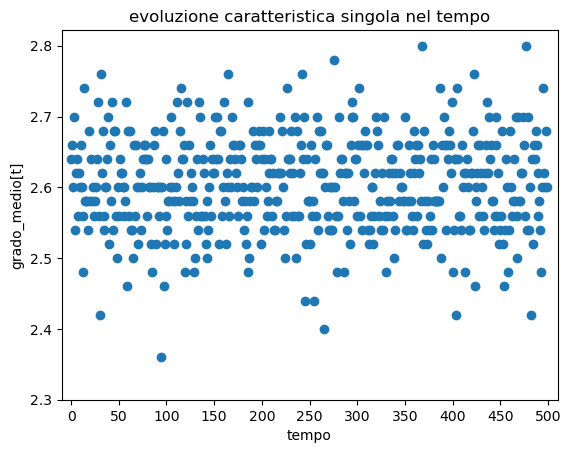

In [30]:
import matplotlib.pyplot as plt

n_time = 500
t = np.arange(0,n_time,1)
print("dim t:",np.shape(t))
print("dim A_t_load:",np.shape(A_t_load))
print("dim A_t_load{0}:",np.shape(A_t_load[0]))


 #devo calcolare il grado medio a ogni step temporale data la matrice di adiacenza():                 n
    #il grado medio è la somma dei gradi dei singoli nodi / n , con n = numero totale nodi : c= 1/n * ∑ k_i
    #    k_i = grado nodo i                                                                          i=1


#///////////////////////////////////////////////////////////////////////////////
def grado_medio(A):
    
    N=int(A.shape[0])
    grado_medio = 0
    elem = 0
    for i in range(N):
        for j in range(N):
            elem = elem + A[i][j] #così sommo tutti gli elementi di matrice quindi poi va diviso per 2
    grado_medio = 1 / N * (elem/2)
    return grado_medio
            

gradi_medi = []   #gradi medi a ogni step
for t_i in range(n_time):
    elem = grado_medio(A_t_load[t_i])
    gradi_medi.append(elem)
   
    
print(np.shape(t))
print(np.shape(elem) )

plt.scatter(t,gradi_medi)
plt.xticks(range(0,n_time+1,50))
plt.xlim(xmin=-10)
plt.xlim(xmax=510)
plt.ylim(ymin=2.3)
plt.xlabel('tempo')
plt.ylabel('grado_medio[t]')
plt.title('evoluzione caratteristica singola nel tempo')
#plt.savefig("grado_medio.png")
plt.show()

np.save('grado_medio',gradi_medi)
np.save('grado_medio_tempi',t)
#//////////////////////////////////////////////////////////////////////////////////////////////

8.2 CENTRALITA' DI GRADO

(500,)
()


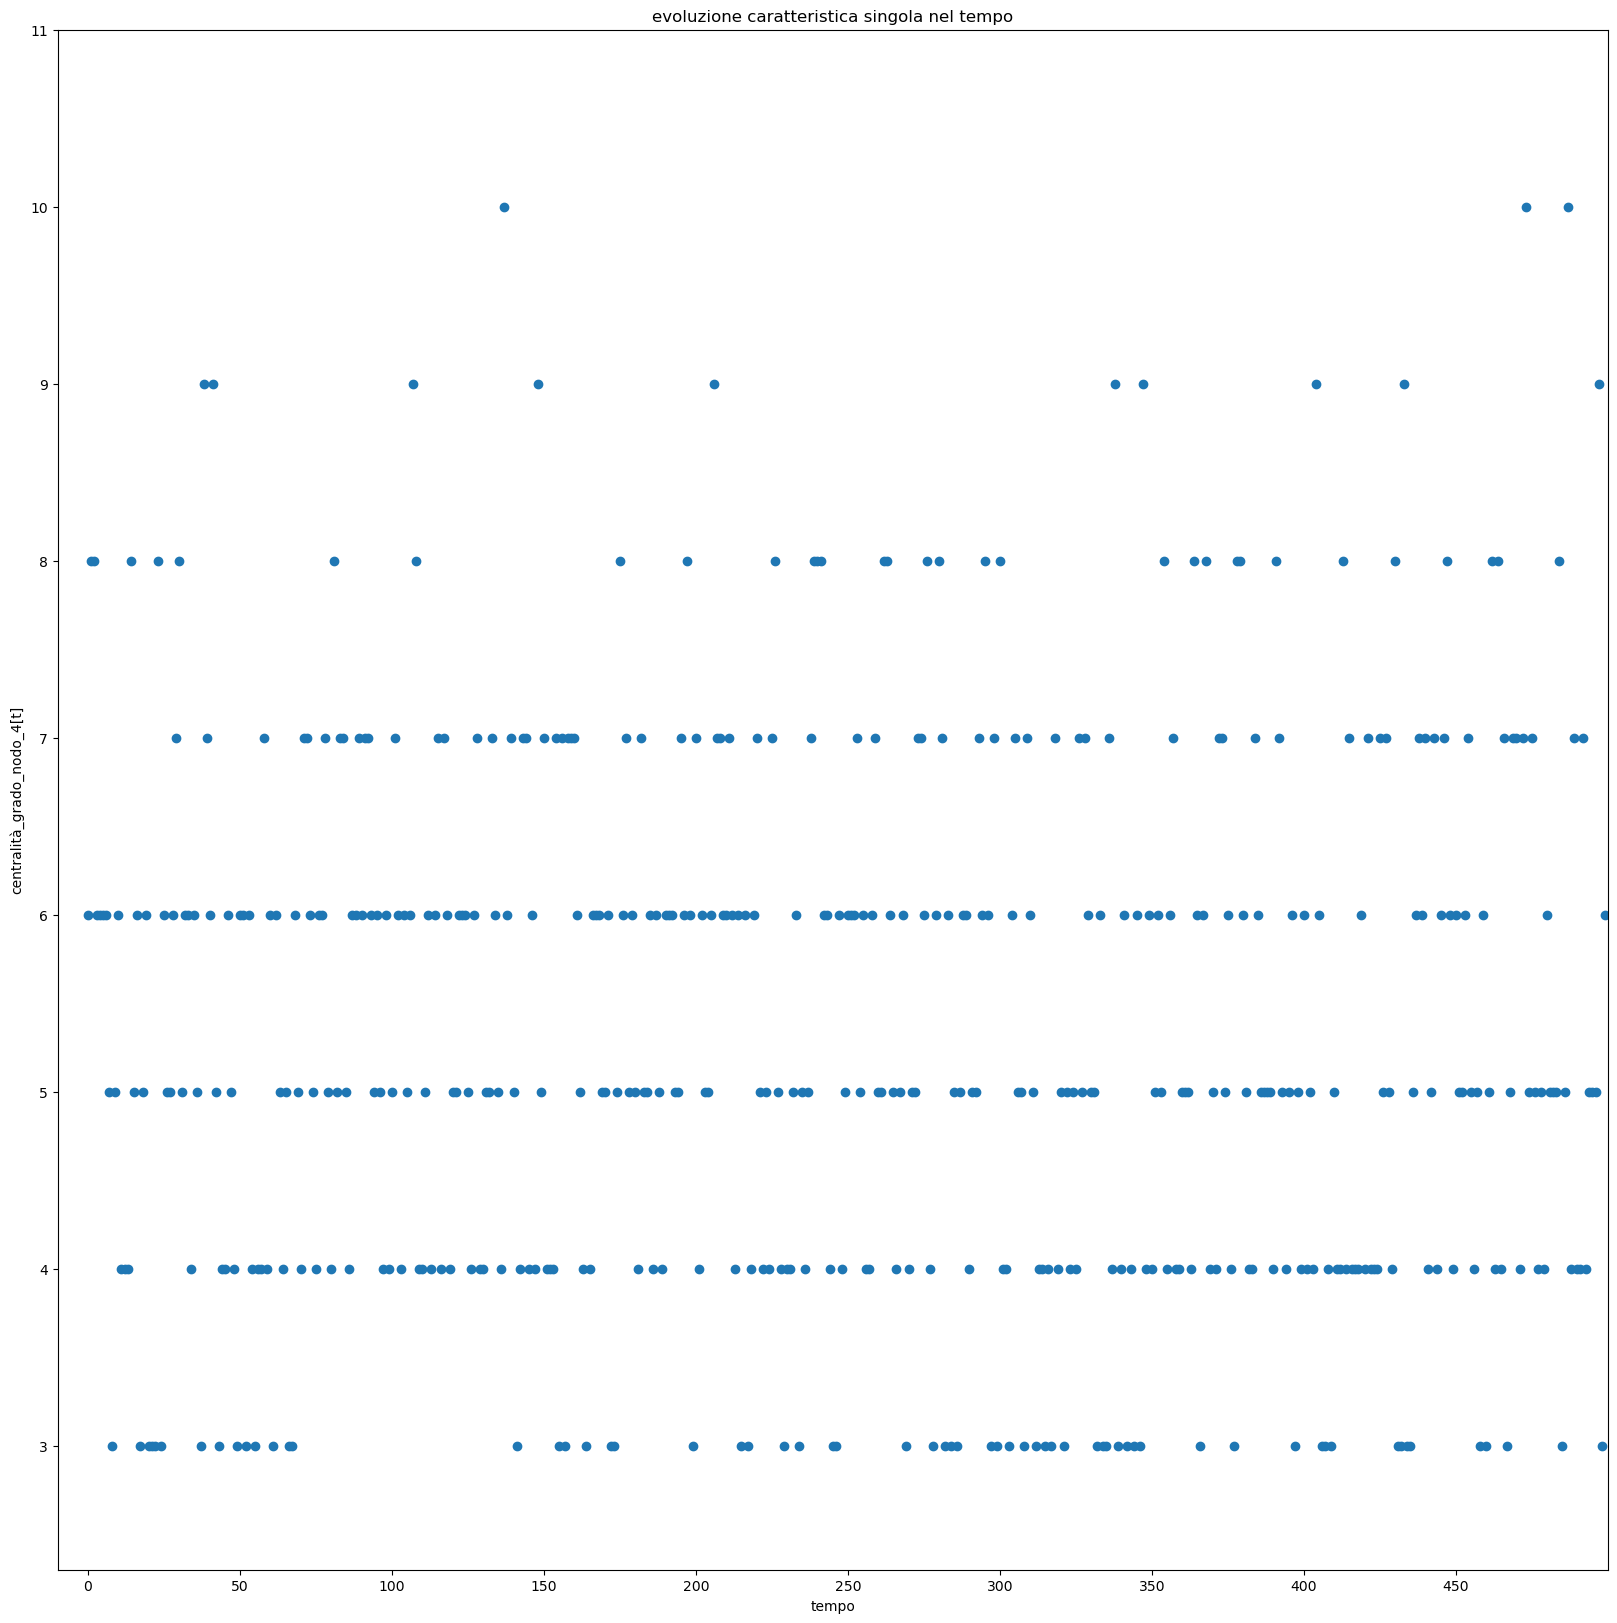

In [31]:
#/////////////////////////////////////////////////////////////////////////////////////

# la centralità di grado del nodo i è definita come:

#       n
# k_i = ∑ A_ij
#      j=1

def centralità_di_grado(A,i):
    j=0
    centr_grado = 0
    N =int(A.shape[0])
    
    for j in range(N):
        centr_grado = centr_grado + A[i][j]
    return centr_grado

centr_grado = []   #centralità di grado a ogni step
i = 4 #devo scegliere un nodo per vedere come varia la centralità di grado a ogni step
n_time = 500
for t_i in range(n_time):
    elem = centralità_di_grado(A_t_load[t_i],i)
    centr_grado.append(elem)
   
    
print(np.shape(t))
print(np.shape(elem) )

plt.figure(figsize =(20,20))
plt.scatter(t,centr_grado)
plt.xticks(range(0,n_time,50))
plt.xlim(xmin=-10)
plt.xlim(xmax=500)
plt.ylim(ymin=2.3)
plt.ylim(ymax=11)
plt.xlabel('tempo')
plt.ylabel('centralità_grado_nodo_4[t]')
plt.title('evoluzione caratteristica singola nel tempo')
#plt.savefig("centralità_grado_nodo_4.png")
plt.show()

np.save('centralità_grado',centr_grado)
np.save('centralita_grado_tempi',t)
#//////////////////////////////////////////////////////////////////////////////////////////////

8.3 DISTRIBUZIONE DI GRADO

<class 'numpy.ndarray'>
lista_gradi_per_nodo: [10, 9, 9, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3]
massimo grado: 10
massimo numero di nodi per grado: 16.0
numero di nodi per grado: [ 0.  0.  0.  8.  9. 16. 12.  2.  0.  2.  1.]
lunghezza lista gradi: 11


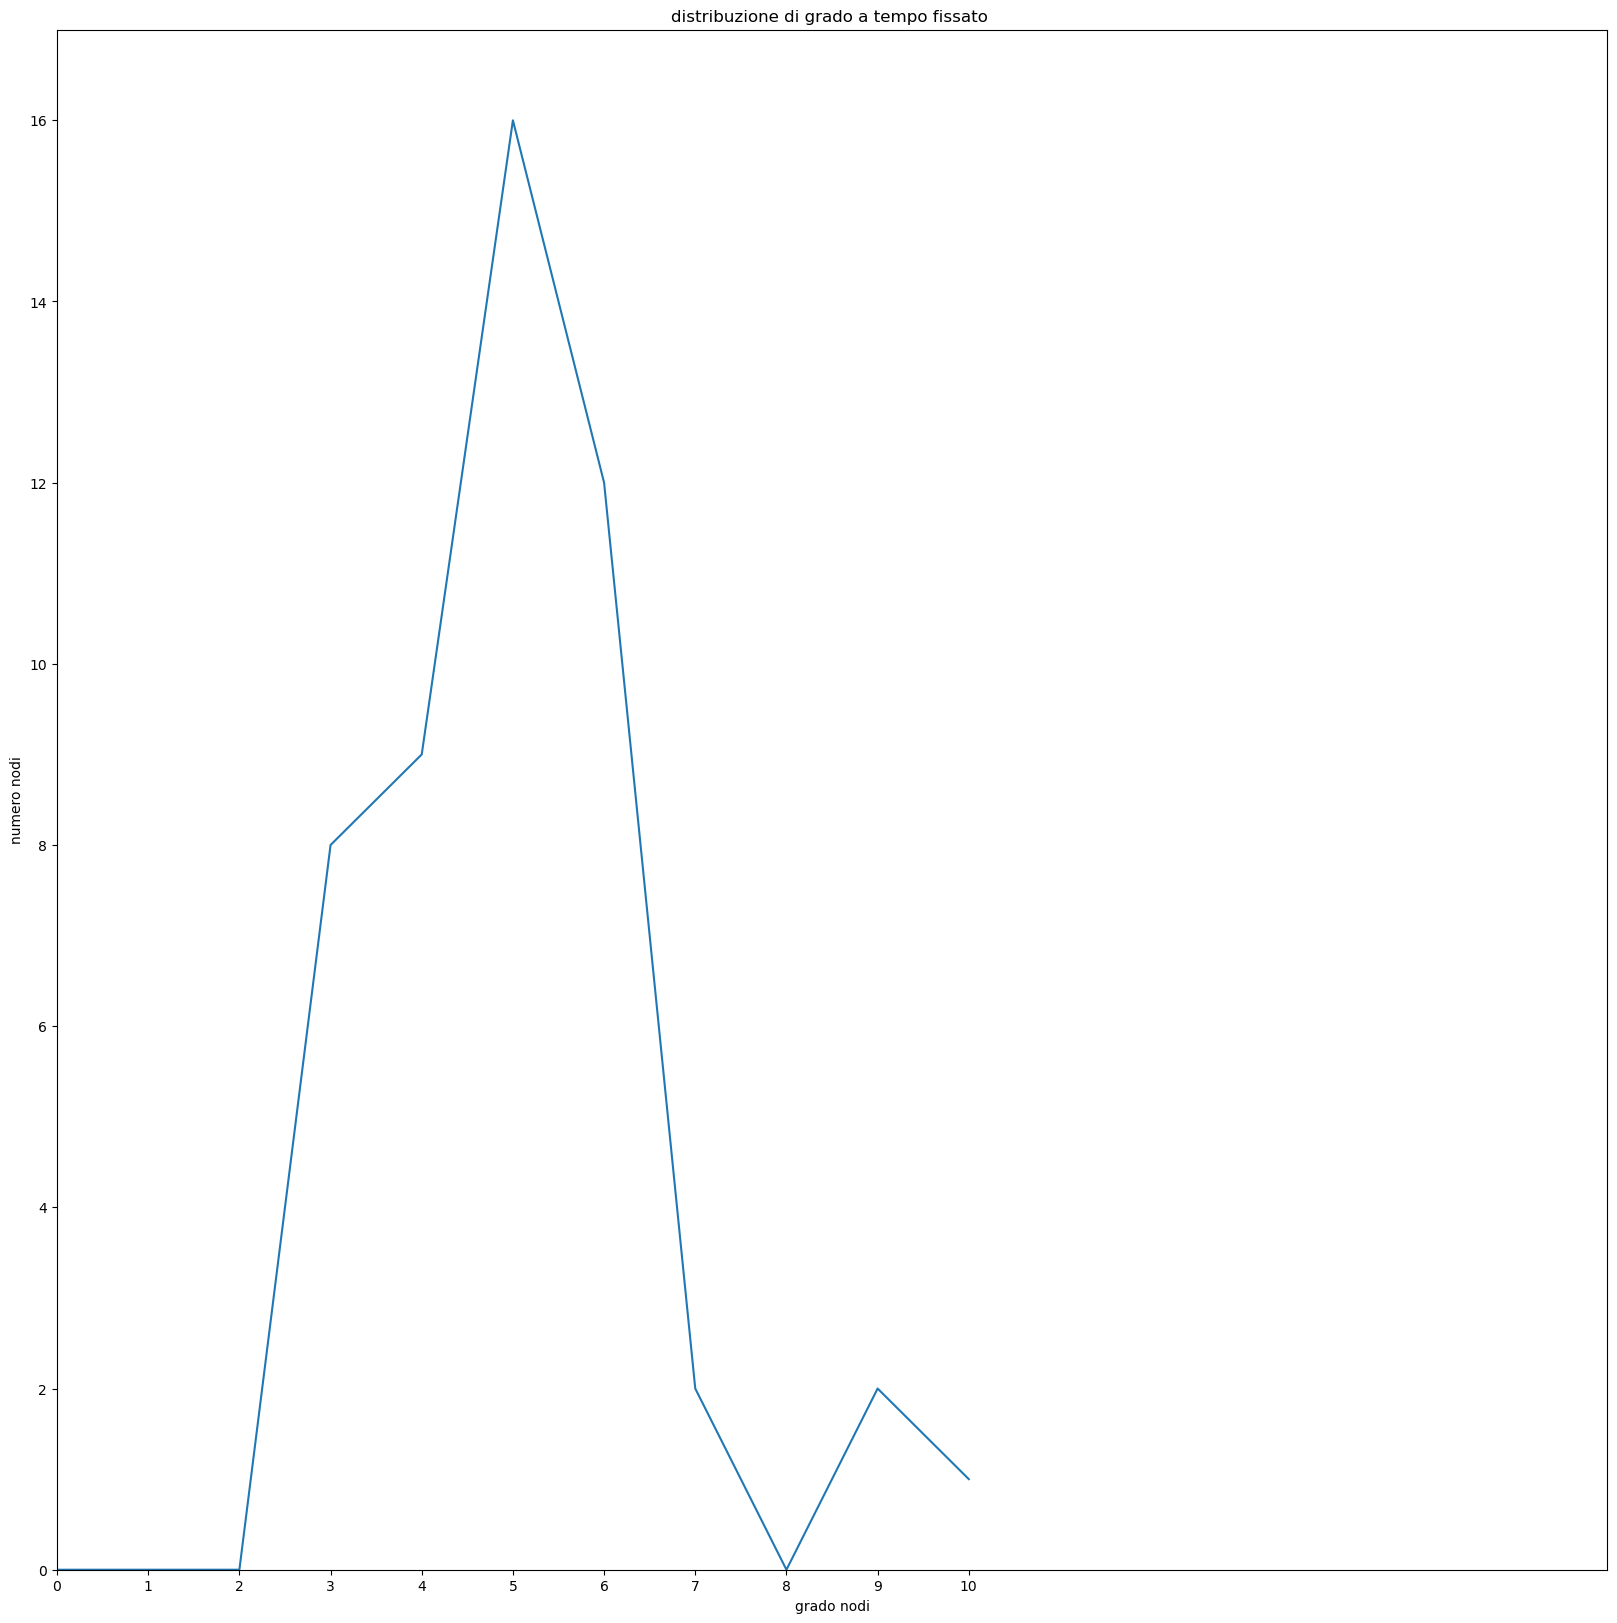

In [29]:
import matplotlib.pyplot as plt

#G = nx.from_numpy_matrix(A) per riottenere il grafo a partire dalla matrice di adiacenza
print(type(A_t_load[0]))


def lista_nodi_per_grado(A_t,t): #distribuzione di grado al tempo t fissato
    
    lista_gradi = []
    G = nx.from_numpy_array(A_t[t]) #riconverto la matrice di adiacenza nel grafo 
    lista_gradi = sorted((d for n, d in G.degree()),reverse = True) #grado di ciascun nodo
    print("lista_gradi_per_nodo:",lista_gradi)
    
    massimo = max(lista_gradi) #massimo grado del grafo
    print("massimo grado:",massimo)
    lunghezza = len(lista_gradi)
    i=0
    j=0
    numero_nodi_per_grado = np.zeros(massimo + 1) #considero anche grado zero
    
    for i in range(massimo +1): #considero tutti i gradi fino al grado massimo a partire da zero con i
        
        for j in range(lunghezza): #scorro tutti gli elementi di  "lista_gradi" con j
            
            if( lista_gradi[j] == i): #se il valore del grado è pari a i lo salvo, così gli elementi di lista numero_nodi_per_grado, saranno ordinati dal grado più basso a quello più alto
                
                
                numero_nodi_per_grado[i] = numero_nodi_per_grado[i] + 1 
                
    return  numero_nodi_per_grado # numero di nodi per ciascun grado, da 0 a grado massimo del grafo (ordinato in modo crescente)

            

t = 4


lista_gradi_output =  lista_nodi_per_grado(A_t_load,t) #numero di nodi per ciascun grado ordinato in ordine crescente da grado zero a grado massimo
massimo = max(lista_gradi_output)
print("massimo numero di nodi per grado:",massimo)
lunghezza = len(lista_gradi_output)
gradi = np.arange(0,lunghezza,1) # lista dei gradi : tutti numeri da zero a grado massimo

#il plot sarà gradi - lista_gradi_output


print("numero di nodi per grado:",lista_gradi_output)
print("lunghezza lista gradi:",lunghezza)



plt.figure(figsize =(20,20))
plt.plot(gradi,lista_gradi_output)
plt.xticks(range(0,lunghezza,1))
plt.xlim(xmin=0)
plt.xlim(xmax= massimo +1)
plt.ylim(ymin=0)
plt.ylim(ymax= massimo +1)
plt.xlabel('grado nodi')
plt.ylabel('numero nodi')
plt.title('distribuzione di grado a tempo fissato ')
np.save('gradi',gradi)
np.save('numero_nodi_per_grado',lista_gradi_output)
#plt.savefig("distribuzione_grado_t=4.png")
plt.show()  
  

In [ ]:
#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

8.4 BETWEENESS CENTRALITY

(500, 50, 50)


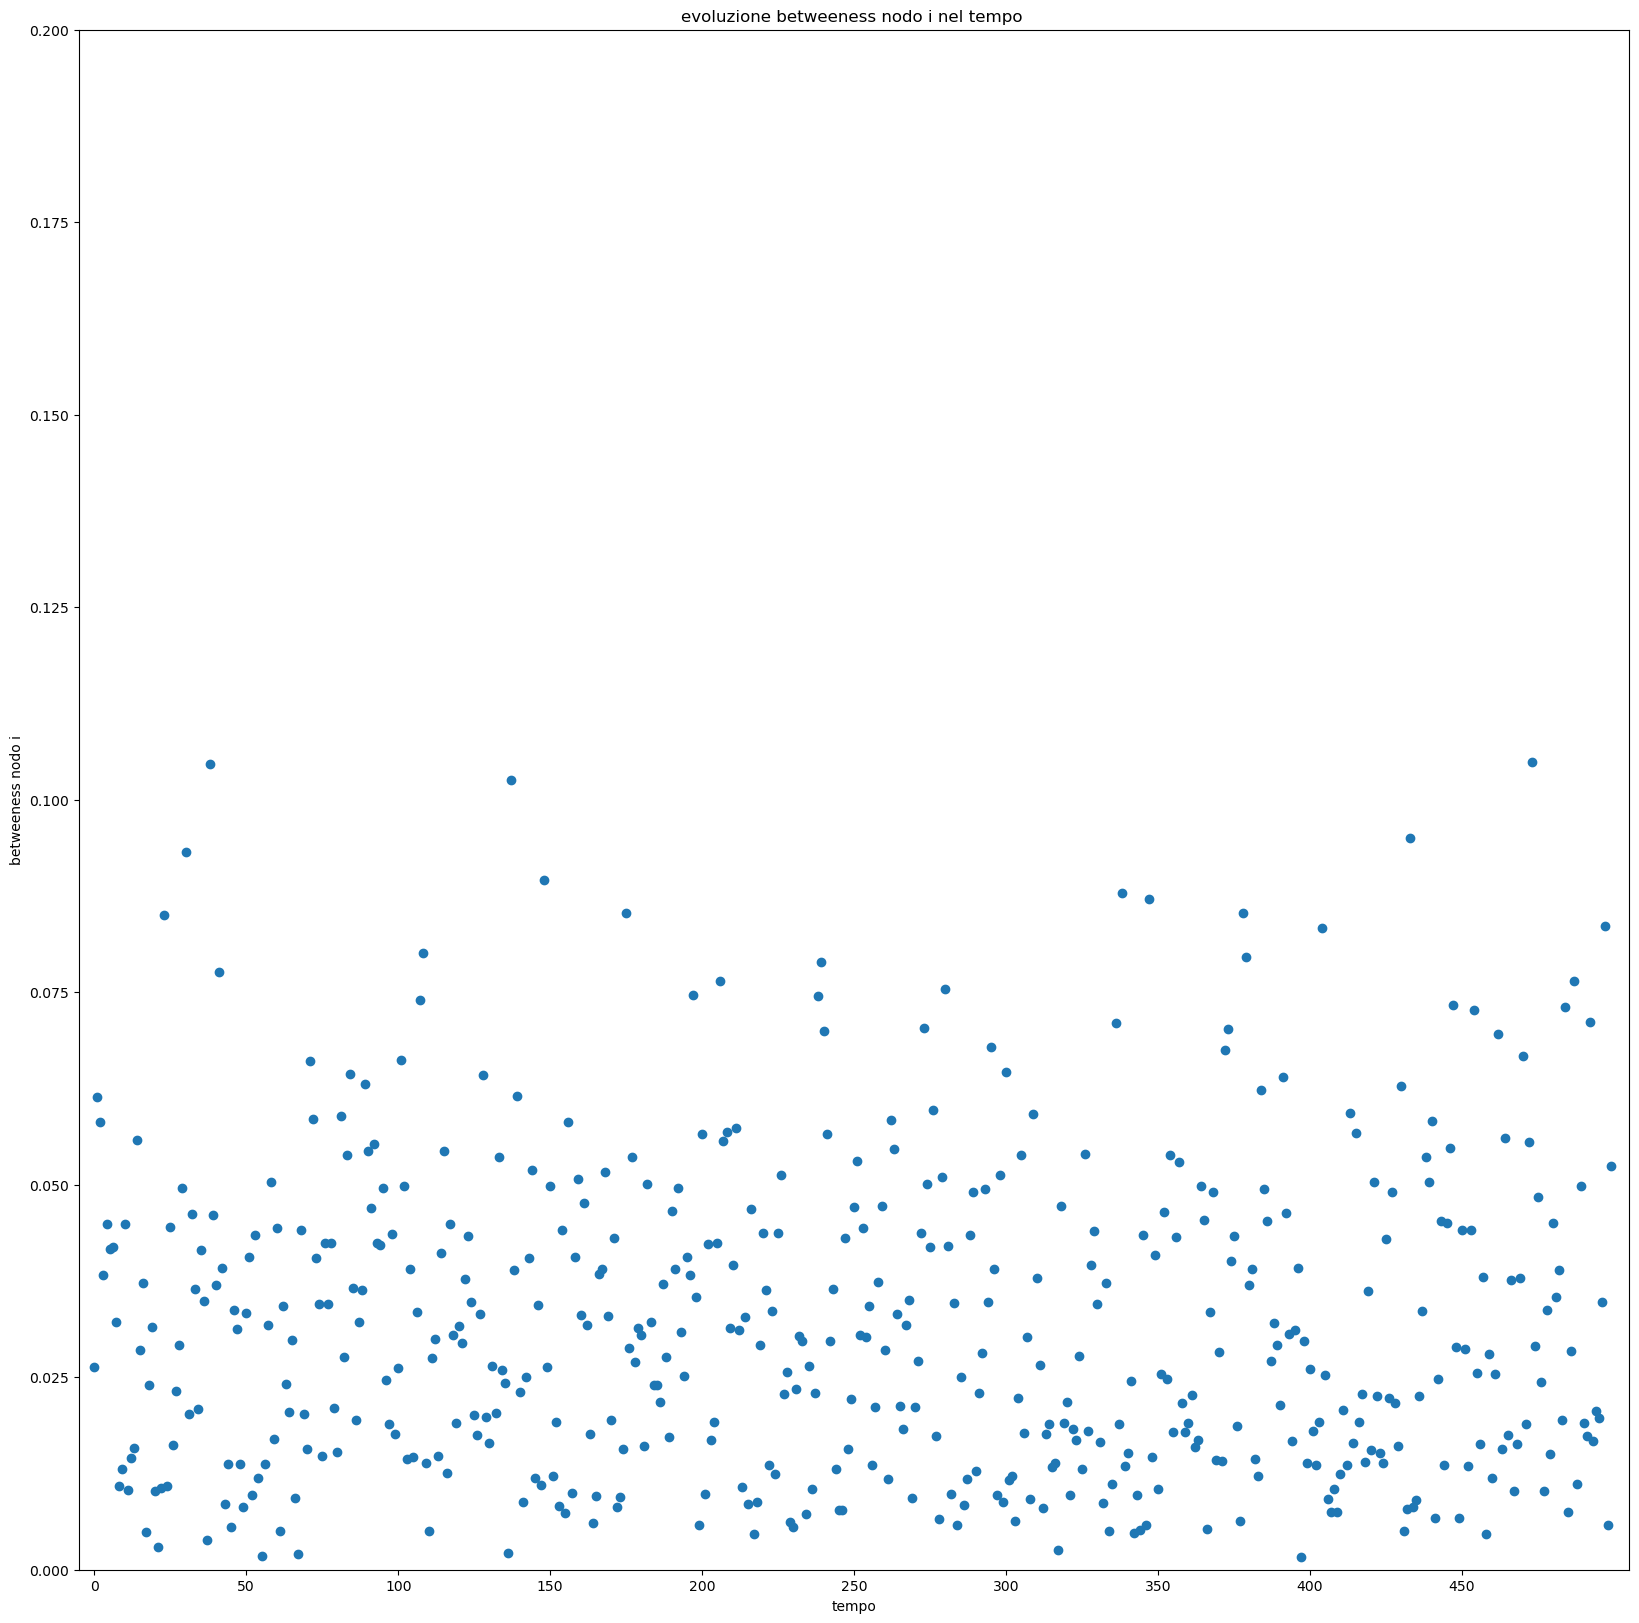

In [33]:
import matplotlib.pyplot as plt

#G = nx.from_numpy_matrix(A) per riottenere il grafo a partire dalla matrice di adiacenza
print(np.shape(A_t_load))
def betweeness_nodi(A,i,t):  #betweeness nodo i
    
    G = nx.from_numpy_array(A)
    betweeness = {}
    
    betweeness = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None) #chiave = nodo, valore = betweeness (per tutti nodi)
    valori = list(betweeness.values())
    elem = valori[i]
    #print("step",t,":",elem)
    return elem

n_time = 500
betweeness_output = []
i = 4 #nodo fissato

for t in range(n_time):
    elem = betweeness_nodi(A_t_load[t],i,t)
    betweeness_output.append(elem)
    
#print("betweeness nodo i a tutti tempi:",betweeness_output)

#devo plottare la lista betweeness_output nel tempo:

n_time = 500
t = np.arange(0,n_time,1)
lunghezza = len(t)


plt.figure(figsize =(20,20))
plt.scatter(t, betweeness_output)
plt.xticks(range(0,lunghezza,50))
plt.xlim(xmin=-5)
plt.xlim(xmax= lunghezza +5)
plt.ylim(ymin=0)
plt.ylim(ymax= 0.2)
plt.xlabel('tempo')
plt.ylabel('betweeness nodo i')
plt.title('evoluzione betweeness nodo i nel tempo ')
#plt.savefig("betweeness nodo 4.png")
plt.show()  

np.save('betweeness',betweeness_output)
np.save('betweeness_tempi',t)

In [ ]:
#FINE PROGRAMMA

In [ ]:
#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#domande sull' output:


"""
Errore: fino a N = 4, T=4 funziona, poi da come errore:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

"""

#NB: il numero di link tende sempre ad aumentare e mai a diminuire mi sembra???
#NB: anche per valori delle caratteristiche negative mi sputa output

#risolto andando su : C:\Users\gianm\.jupyter->jupyter_notebook_config e modificato il valore c.NotebookApp.iopub_data_rate_limit = 10000000